# Importing Libraries and dataset

In [1]:
import pickle  #to unpickle data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [2]:
train = open('train_image.pkl','rb')
train_data = pickle.load(train)
train.close()
test = open('test_image.pkl','rb')
test_data = pickle.load(test)
test.close()
temp = open('train_label.pkl','rb')
label = pickle.load(temp)


In [3]:
label[1]

0

In [4]:
# creating alias for label as --> 2->1, 3->2, 6->3 to simplify the process of categorical conversion of labels
label = pd.Series(label)

for i in range(len(label)):
    if label[i]==2:
        label[i] = 1
    
    elif label[i]==3:
        label[i] = 2
        
    elif label[i]==6:
        label[i] = 3

                              
label = pd.Series(label)
label.value_counts()

3    2000
2    2000
1    2000
0    2000
dtype: int64

In [5]:
type(label)

pandas.core.series.Series

In [6]:
len(train_data[1])


784

## Creating dataset

In [7]:
X_train = pd.DataFrame(train_data) # converting the list to pandas dataframe

In [8]:
type(X_train)

pandas.core.frame.DataFrame

In [9]:
X_train.shape

(8000, 784)

In [10]:
test = pd.DataFrame(test_data)   # converting the list to pandas dataframe

In [11]:
test.shape

(2000, 784)

In [12]:
# Normalising the data to reduce variance
X_train = X_train / 255.0
test = test / 255.0

In [13]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1) as it will be the input to the CNN
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [14]:
type(X_train)


numpy.ndarray

In [15]:
X_train.shape

(8000, 28, 28, 1)

 ## Label encoding

In [16]:
type(label)

pandas.core.series.Series

In [17]:
label = to_categorical(label, num_classes = 4)

## Split training and valdiation set

In [18]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, label, test_size = 0.15, random_state=12)

In [19]:
type(X_train[0])

numpy.ndarray

In [20]:
Y_train

array([[ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       ..., 
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.]], dtype=float32)

In [21]:
Y_train.shape

(6800, 4)

In [22]:
#Creating a CNN using keras Sequential library which caontain 2 convolutional layers and 2 fully connected layers with maxpooling ans 2 droput layesrs

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(4, activation='softmax'))  
    


In [23]:
# Compiling the model and fitting the model on the dataset
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

history = model.fit(X_train,Y_train, epochs=10, validation_data=(X_val, Y_val))


Train on 6800 samples, validate on 1200 samples
Epoch 1/10
6800/6800 [==============================] - 55s 8ms/step - loss: 0.6433 - acc: 0.7391 - val_loss: 0.5421 - val_acc: 0.7925
Epoch 2/10
6800/6800 [==============================] - 52s 8ms/step - loss: 0.4643 - acc: 0.8206 - val_loss: 0.4174 - val_acc: 0.8375
Epoch 3/10
6800/6800 [==============================] - 56s 8ms/step - loss: 0.3921 - acc: 0.8513 - val_loss: 0.3961 - val_acc: 0.8483
Epoch 4/10
6800/6800 [==============================] - 56s 8ms/step - loss: 0.3611 - acc: 0.8591 - val_loss: 0.3849 - val_acc: 0.8442
Epoch 5/10
6800/6800 [==============================] - 57s 8ms/step - loss: 0.3241 - acc: 0.8701 - val_loss: 0.3691 - val_acc: 0.8583
Epoch 6/10
6800/6800 [==============================] - 51s 8ms/step - loss: 0.2937 - acc: 0.8794 - val_loss: 0.3816 - val_acc: 0.8625
Epoch 7/10
6800/6800 [==============================] - 56s 8ms/step - loss: 0.2693 - acc: 0.8910 - val_loss: 0.3510 - val_acc: 0.8767
Epoch 8

## Plotting and analysis

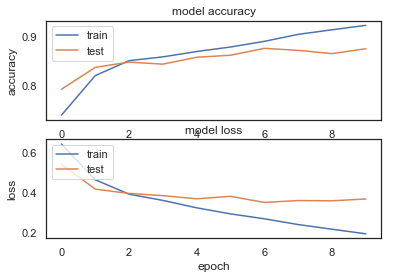

In [24]:
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 

In [25]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
confusion_mtx

array([[242,   5,   9,  28],
       [  3, 290,   1,  17],
       [  8,   4, 278,  10],
       [ 31,  24,   9, 241]], dtype=int64)

## Predictions and Saving results

In [26]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [27]:
results.value_counts(dropna=False)


3    523
0    502
1    491
2    484
Name: Label, dtype: int64

In [28]:
type(results)

pandas.core.series.Series

6    523
0    502
2    491
3    484
Name: Label, dtype: int64

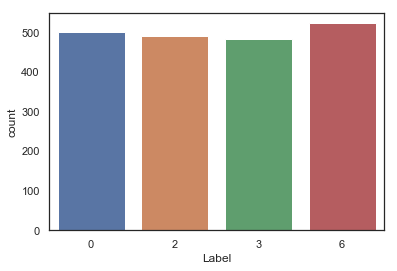

In [29]:
results = pd.Series(results)

for i in range(len(results)):
    if results[i]==1:
        results[i] = 2
    
    elif results[i]==2:
        results[i] = 3
        
    elif results[i]==3:
        results[i] = 6

                                   
g = sns.countplot(results)
results = pd.Series(results)
results.value_counts()

In [31]:
results.to_csv('Gaurav_Lochab.csv')

C:\Users\Rahul\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
